# Hierarchical clustering using University dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel(r'D:\Data Scientist\Clustering\Agglomerative clustering\Dataset\University_Clustering.xlsx')

In [4]:
df

,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,RI,1310.0,89,22,13.0,22704,94.0
1,2,CalTech,CA,1415.0,100,25,6.0,63575,81.0
2,3,CMU,PA,1260.0,62,59,9.0,25026,72.0
3,4,Columbia,NY,1310.0,76,24,12.0,31510,NaN
4,5,Cornell,NY,1280.0,83,33,13.0,21864,90.0
5,6,Dartmouth,NH,1340.0,89,23,10.0,32162,95.0
6,7,Duke,NC,1315.0,90,30,12.0,31585,95.0
7,8,Georgetown,DC,NaN,74,24,12.0,20126,92.0
8,9,Harvard,MA,1400.0,91,14,11.0,39525,97.0
9,10,JohnsHopkins,MD,1305.0,75,44,7.0,58691,87.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UnivID    25 non-null     int64  
 1   Univ      25 non-null     object 
 2   State     25 non-null     object 
 3   SAT       24 non-null     float64
 4   Top10     25 non-null     int64  
 5   Accept    25 non-null     int64  
 6   SFRatio   24 non-null     float64
 7   Expenses  25 non-null     int64  
 8   GradRate  24 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.9+ KB


In [ ]:
# we need to change datatype of feature UnivID(use typecasting)

In [6]:
df.UnivID = df.UnivID.astype('str')

In [7]:
df.dtypes

UnivID       object
Univ         object
State        object
SAT         float64
Top10         int64
Accept        int64
SFRatio     float64
Expenses      int64
GradRate    float64
dtype: object

In [ ]:
# drop the column UnivID

In [8]:
df.drop(['UnivID'], axis = 1,inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       24 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   24 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  24 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ KB


In [ ]:
# Exploratort Data Analysis\Discriptive statastics\Discriptive analytics

In [10]:
# Measure of central tendency(first moment business decision)

print(df.mean())
print('\n')
print(df.median())
print('\n')
print(df.mode())

SAT          1266.916667
Top10          76.480000
Accept         39.200000
SFRatio        12.708333
Expenses    27388.000000
GradRate       86.666667
dtype: float64


SAT          1287.5
Top10          81.0
Accept         36.0
SFRatio        12.0
Expenses    27553.0
GradRate       90.0
dtype: float64


            Univ State     SAT  Top10  Accept  SFRatio  Expenses  GradRate
0          Brown    CA  1260.0   75.0    14.0     11.0      8704      95.0
1            CMU    PA  1310.0   89.0    24.0     12.0      9066       NaN
2        CalTech   NaN  1375.0   90.0    30.0      NaN     10185       NaN
3       Columbia   NaN     NaN   91.0    44.0      NaN     11857       NaN
4        Cornell   NaN     NaN   95.0     NaN      NaN     13349       NaN
5      Dartmouth   NaN     NaN    NaN     NaN      NaN     15122       NaN
6           Duke   NaN     NaN    NaN     NaN      NaN     15140       NaN
7     Georgetown   NaN     NaN    NaN     NaN      NaN     15470       NaN
8        Harvard   Na

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5172\2924674535.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5172\2924674535.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.median())


In [11]:
# Measure of Dispersion(Second momemt business decision)

print(df.var())
print('\n')
print(df.std())

SAT         1.224643e+04
Top10       3.776767e+02
Accept      3.891667e+02
SFRatio     1.725906e+01
Expenses    2.080773e+08
GradRate    8.553623e+01
dtype: float64


SAT           110.663578
Top10          19.433905
Accept         19.727308
SFRatio         4.154402
Expenses    14424.883165
GradRate        9.248580
dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5172\2495461153.py:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.var())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5172\2495461153.py:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.std())


In [12]:
# Third moment business decision

print(df.skew())

SAT        -0.948996
Top10      -1.219756
Accept      0.867538
SFRatio     1.110628
Expenses    0.852350
GradRate   -0.964565
dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5172\1897738699.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.skew())


In [13]:
# Fourth moment business decision

print(df.kurt())

SAT         0.240543
Top10       0.700307
Accept      0.252908
SFRatio     2.171173
Expenses    0.638162
GradRate   -0.307285
dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5172\3215733202.py:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.kurt())


In [14]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,24.000000,25.000000,25.000000,24.000000,25.000000,24.000000
mean,1266.916667,76.480000,39.200000,12.708333,27388.000000,86.666667
std,110.663578,19.433905,19.727308,4.154402,14424.883165,9.248580
min,1005.000000,28.000000,14.000000,6.000000,8704.000000,67.000000
25%,1236.250000,74.000000,24.000000,10.750000,15140.000000,80.750000
50%,1287.500000,81.000000,36.000000,12.000000,27553.000000,90.000000
75%,1345.000000,90.000000,50.000000,14.250000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.000000,63575.000000,97.000000


In [ ]:
# find out the duplicates

In [15]:
duplicates = df.duplicated()

In [16]:
duplicates.sum()# no duplicates

0

In [ ]:
# Missing values

In [17]:
df.isna().sum()

Univ        0
State       0
SAT         1
Top10       0
Accept      0
SFRatio     1
Expenses    0
GradRate    1
dtype: int64

In [ ]:
# Imputation using mean,median,mode

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [20]:
df['SAT'] = pd.DataFrame(mean_imputer.fit_transform(df[['SAT']]))

In [21]:
df['SAT'].isna().sum()

0

In [22]:
median_imputer = SimpleImputer(missing_values = np.nan,strategy = 'median')

In [23]:
df['SFRatio'] = pd.DataFrame(median_imputer.fit_transform(df[['SFRatio']]))

In [24]:
df['SFRatio'].isna().sum()

0

In [25]:
from feature_engine.imputation import RandomSampleImputer

random_imputer = RandomSampleImputer(['GradRate'])
df["GradRate"] = pd.DataFrame(random_imputer.fit_transform(df[["GradRate"]]))

df["GradRate"].isna().sum()

0

In [ ]:
# Outlier analysis using Box plot

SAT            Axes(0.125,0.11;0.110714x0.77)
Top10       Axes(0.257857,0.11;0.110714x0.77)
Accept      Axes(0.390714,0.11;0.110714x0.77)
SFRatio     Axes(0.523571,0.11;0.110714x0.77)
Expenses    Axes(0.656429,0.11;0.110714x0.77)
GradRate    Axes(0.789286,0.11;0.110714x0.77)
dtype: object

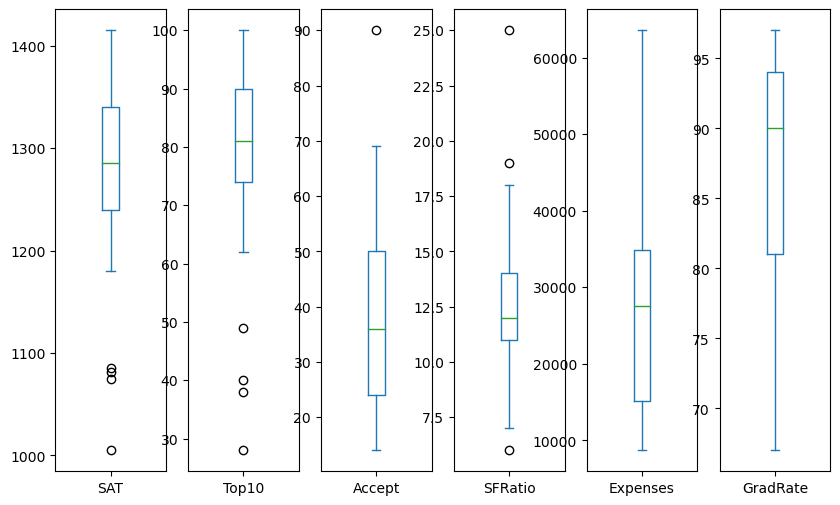

In [26]:
df.plot(kind = 'box',subplots = True,sharey = False,figsize = (10,6))

In [ ]:
# We use Winsorization technique to remove the outliers

In [27]:
from feature_engine.outliers import Winsorizer

In [28]:
wins_iqr = Winsorizer(capping_method = 'iqr',
                     tail = 'left',
                     fold = 1.5,
                     variables = ['SAT'])
df['SAT'] = pd.DataFrame(wins_iqr.fit_transform(df[['SAT']]))

In [29]:
wins_iqr = Winsorizer(capping_method = 'iqr',
                     tail = 'left',
                     fold = 1.5,
                     variables = ['Top10'])
df['Top10'] = pd.DataFrame(wins_iqr.fit_transform(df[['Top10']]))

In [30]:
wins_iqr = Winsorizer(capping_method = 'iqr',
                     tail = 'right',
                     fold = 1.5,
                     variables = ['Accept'])
df['Accept'] = pd.DataFrame(wins_iqr.fit_transform(df[['Accept']]))

In [31]:
wins_iqr = Winsorizer(capping_method = 'iqr',
                     tail = 'both',
                     fold = 1.5,
                     variables = ['SFRatio'])
df['SFRatio'] = pd.DataFrame(wins_iqr.fit_transform(df[['SFRatio']]))

In [ ]:
# we see still outlier or not using box plot

SAT            Axes(0.125,0.11;0.110714x0.77)
Top10       Axes(0.257857,0.11;0.110714x0.77)
Accept      Axes(0.390714,0.11;0.110714x0.77)
SFRatio     Axes(0.523571,0.11;0.110714x0.77)
Expenses    Axes(0.656429,0.11;0.110714x0.77)
GradRate    Axes(0.789286,0.11;0.110714x0.77)
dtype: object

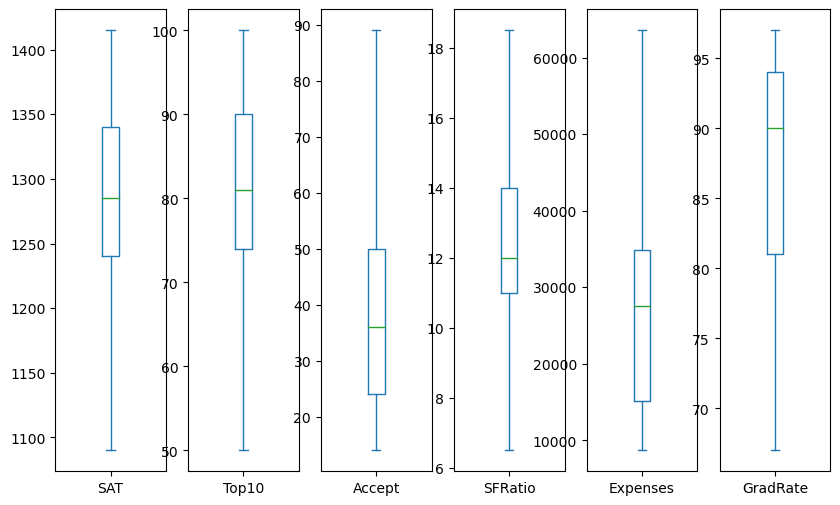

In [32]:
df.plot(kind = 'box',subplots = True, sharey = False,figsize = (10,6))# NO OUTLIER

In [ ]:
# Zero variance and near zero variance

In [33]:
df.var()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5172\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


SAT         9.718958e+03
Top10       2.446267e+02
Accept      3.849733e+02
SFRatio     1.105583e+01
Expenses    2.080773e+08
GradRate    8.311000e+01
dtype: float64

In [ ]:
# Dividing Categorical and Numerical Data seperate

In [34]:
df

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310.000000,89,22,13.0,22704,94.0
1,CalTech,CA,1415.000000,100,25,6.5,63575,81.0
2,CMU,PA,1260.000000,62,59,9.0,25026,72.0
3,Columbia,NY,1310.000000,76,24,12.0,31510,92.0
4,Cornell,NY,1280.000000,83,33,13.0,21864,90.0
5,Dartmouth,NH,1340.000000,89,23,10.0,32162,95.0
6,Duke,NC,1315.000000,90,30,12.0,31585,95.0
7,Georgetown,DC,1266.916667,74,24,12.0,20126,92.0
8,Harvard,MA,1400.000000,91,14,11.0,39525,97.0
9,JohnsHopkins,MD,1305.000000,75,44,7.0,58691,87.0


In [35]:
df_cat = df.iloc[ : , :2]
df_cat.head()

,Univ,State
0,Brown,RI
1,CalTech,CA
2,CMU,PA
3,Columbia,NY
4,Cornell,NY


In [36]:
df_num = df.iloc[ : , 2: ]
df_num.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310.0,89,22,13.0,22704,94.0
1,1415.0,100,25,6.5,63575,81.0
2,1260.0,62,59,9.0,25026,72.0
3,1310.0,76,24,12.0,31510,92.0
4,1280.0,83,33,13.0,21864,90.0


In [ ]:
# We create dummy variable for State(not for Univ becoz this is identity)

In [37]:
print(df_cat.State.unique())
print('\n')
print(df_cat.State.value_counts())

['RI' 'CA' 'PA' 'NY' 'NH' 'NC' 'DC' 'MA' 'MD' 'IL' 'IN' 'NJ' 'TX' 'MI'
 'VA' 'WI' 'CT']


PA    3
CA    3
NY    2
MA    2
IL    2
IN    2
RI    1
TX    1
WI    1
VA    1
MI    1
MD    1
NJ    1
DC    1
NC    1
NH    1
CT    1
Name: State, dtype: int64


In [38]:
df_cat.nunique()

Univ     25
State    17
dtype: int64

In [39]:
df_cat = pd.get_dummies(df_cat, columns = ['State'],drop_first = True)

In [61]:
df_cat

,Univ,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,State_NJ,State_NY,State_PA,State_RI,State_TX,State_VA,State_WI
0,Brown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,CalTech,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CMU,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Columbia,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Cornell,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,Dartmouth,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,Duke,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,Georgetown,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Harvard,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,JohnsHopkins,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [40]:
df_cat.describe()

,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,State_NJ,State_NY,State_PA,State_RI,State_TX,State_VA,State_WI
count,25.00,25.00,25.000000,25.000000,25.000000,25.00,25.00,25.00,25.00,25.00,25.000000,25.000000,25.00,25.00,25.00,25.00
mean,0.04,0.04,0.080000,0.080000,0.080000,0.04,0.04,0.04,0.04,0.04,0.080000,0.120000,0.04,0.04,0.04,0.04
std,0.20,0.20,0.276887,0.276887,0.276887,0.20,0.20,0.20,0.20,0.20,0.276887,0.331662,0.20,0.20,0.20,0.20
min,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00
max,1.00,1.00,1.000000,1.000000,1.000000,1.00,1.00,1.00,1.00,1.00,1.000000,1.000000,1.00,1.00,1.00,1.00


In [ ]:
# Before we normalize data we need to see that our data is normally distributed or not so we use probplot for all the numerical features

In [41]:
import scipy.stats as stats
import pylab

In [42]:
df_num.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310.0,89,22,13.0,22704,94.0
1,1415.0,100,25,6.5,63575,81.0
2,1260.0,62,59,9.0,25026,72.0
3,1310.0,76,24,12.0,31510,92.0
4,1280.0,83,33,13.0,21864,90.0


((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([1090.        , 1090.        , 1090.        , 1090.        ,
         1180.        , 1225.        , 1240.        , 1255.        ,
         1260.        , 1260.        , 1266.91666667, 1280.        ,
         1285.        , 1290.        , 1305.        , 1310.        ,
         1310.        , 1315.        , 1340.        , 1360.        ,
         1375.        , 1375.        , 1380.        , 1400.        ,
         1415.        ])),
 (98.76659036154764, 1271.4766666666667, 0.9585447047103507))

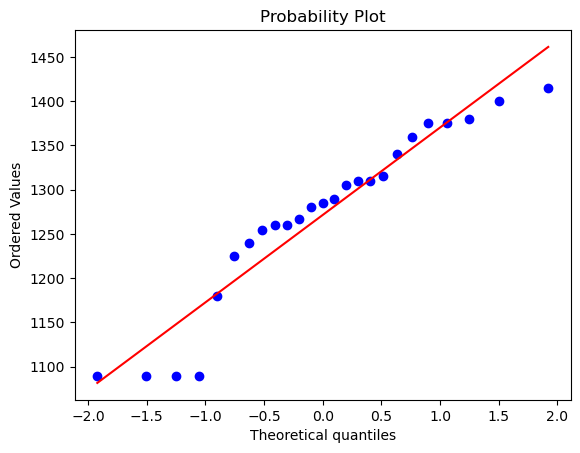

In [43]:
# SAT
stats.probplot(df_num['SAT'],dist = 'norm',plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 50,  50,  50,  50,  62,  65,  74,  75,  75,  76,  77,  80,  81,
          83,  85,  89,  89,  90,  90,  91,  91,  94,  95,  95, 100],
        dtype=int64)),
 (15.548174662321602, 78.28, 0.9511295549439862))

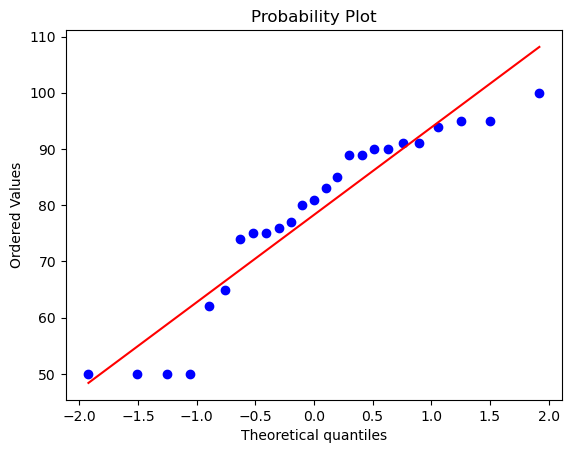

In [44]:
# Top10
stats.probplot(df_num['Top10'], dist = 'norm', plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([14, 14, 19, 20, 22, 23, 24, 24, 25, 30, 30, 33, 36, 39, 40, 42, 44,
         44, 50, 54, 59, 67, 68, 69, 89], dtype=int64)),
 (19.806179416701234, 39.16, 0.9658230149511989))

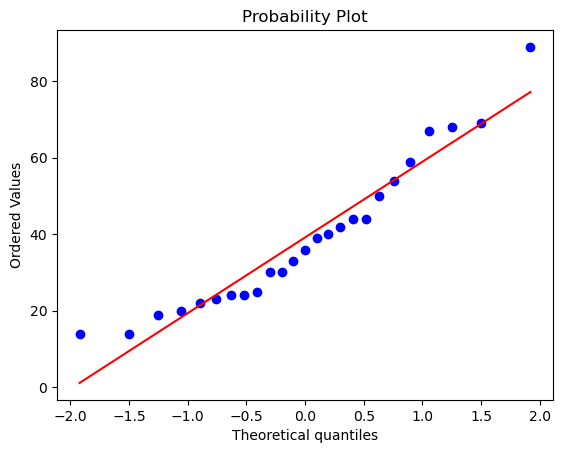

In [45]:
# Accept
stats.probplot(df_num['Accept'],dist = 'norm',plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 6.5,  7. ,  8. ,  9. , 10. , 10. , 11. , 11. , 11. , 11. , 12. ,
         12. , 12. , 12. , 12. , 13. , 13. , 13. , 14. , 15. , 16. , 17. ,
         18. , 18.5, 18.5])),
 (3.4058243652179456, 12.42, 0.9800284234738135))

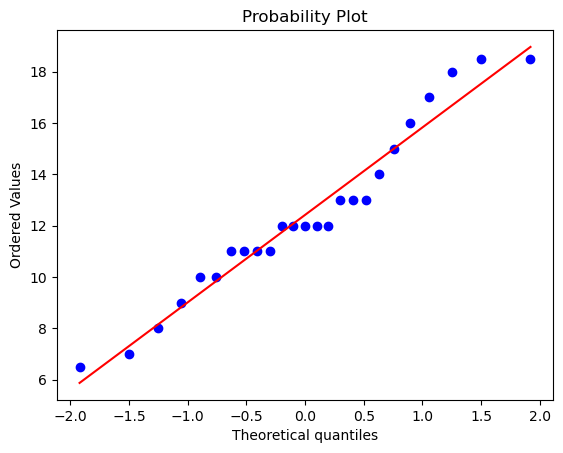

In [46]:
# SFRatio
stats.probplot(df_num['SFRatio'],dist = 'norm', plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 8704,  9066, 10185, 11857, 13349, 15122, 15140, 15470, 20126,
         21864, 22704, 25026, 27553, 28052, 30220, 31510, 31585, 32162,
         34870, 36450, 38380, 39525, 43514, 58691, 63575], dtype=int64)),
 (14567.431669324984, 27387.999999999996, 0.96623519023699))

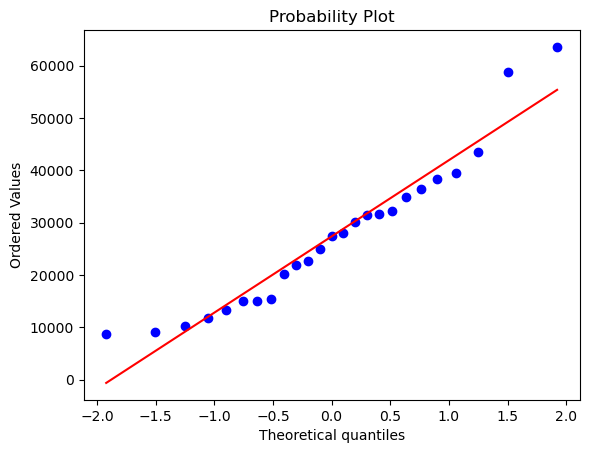

In [47]:
#Expenses
stats.probplot(df_num['Expenses'],dist = 'norm', plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([67., 69., 71., 72., 78., 80., 81., 85., 87., 87., 89., 90., 90.,
         91., 92., 92., 92., 93., 94., 94., 95., 95., 95., 96., 97.])),
 (8.876382254997784, 86.88, 0.931582926463579))

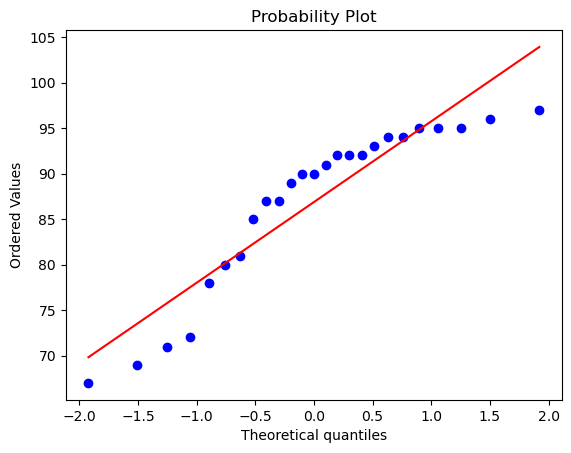

In [48]:
#GradRate
stats.probplot(df_num['GradRate'], dist = 'norm', plot = pylab)

In [ ]:
# Bivariate analysis use scatter plot

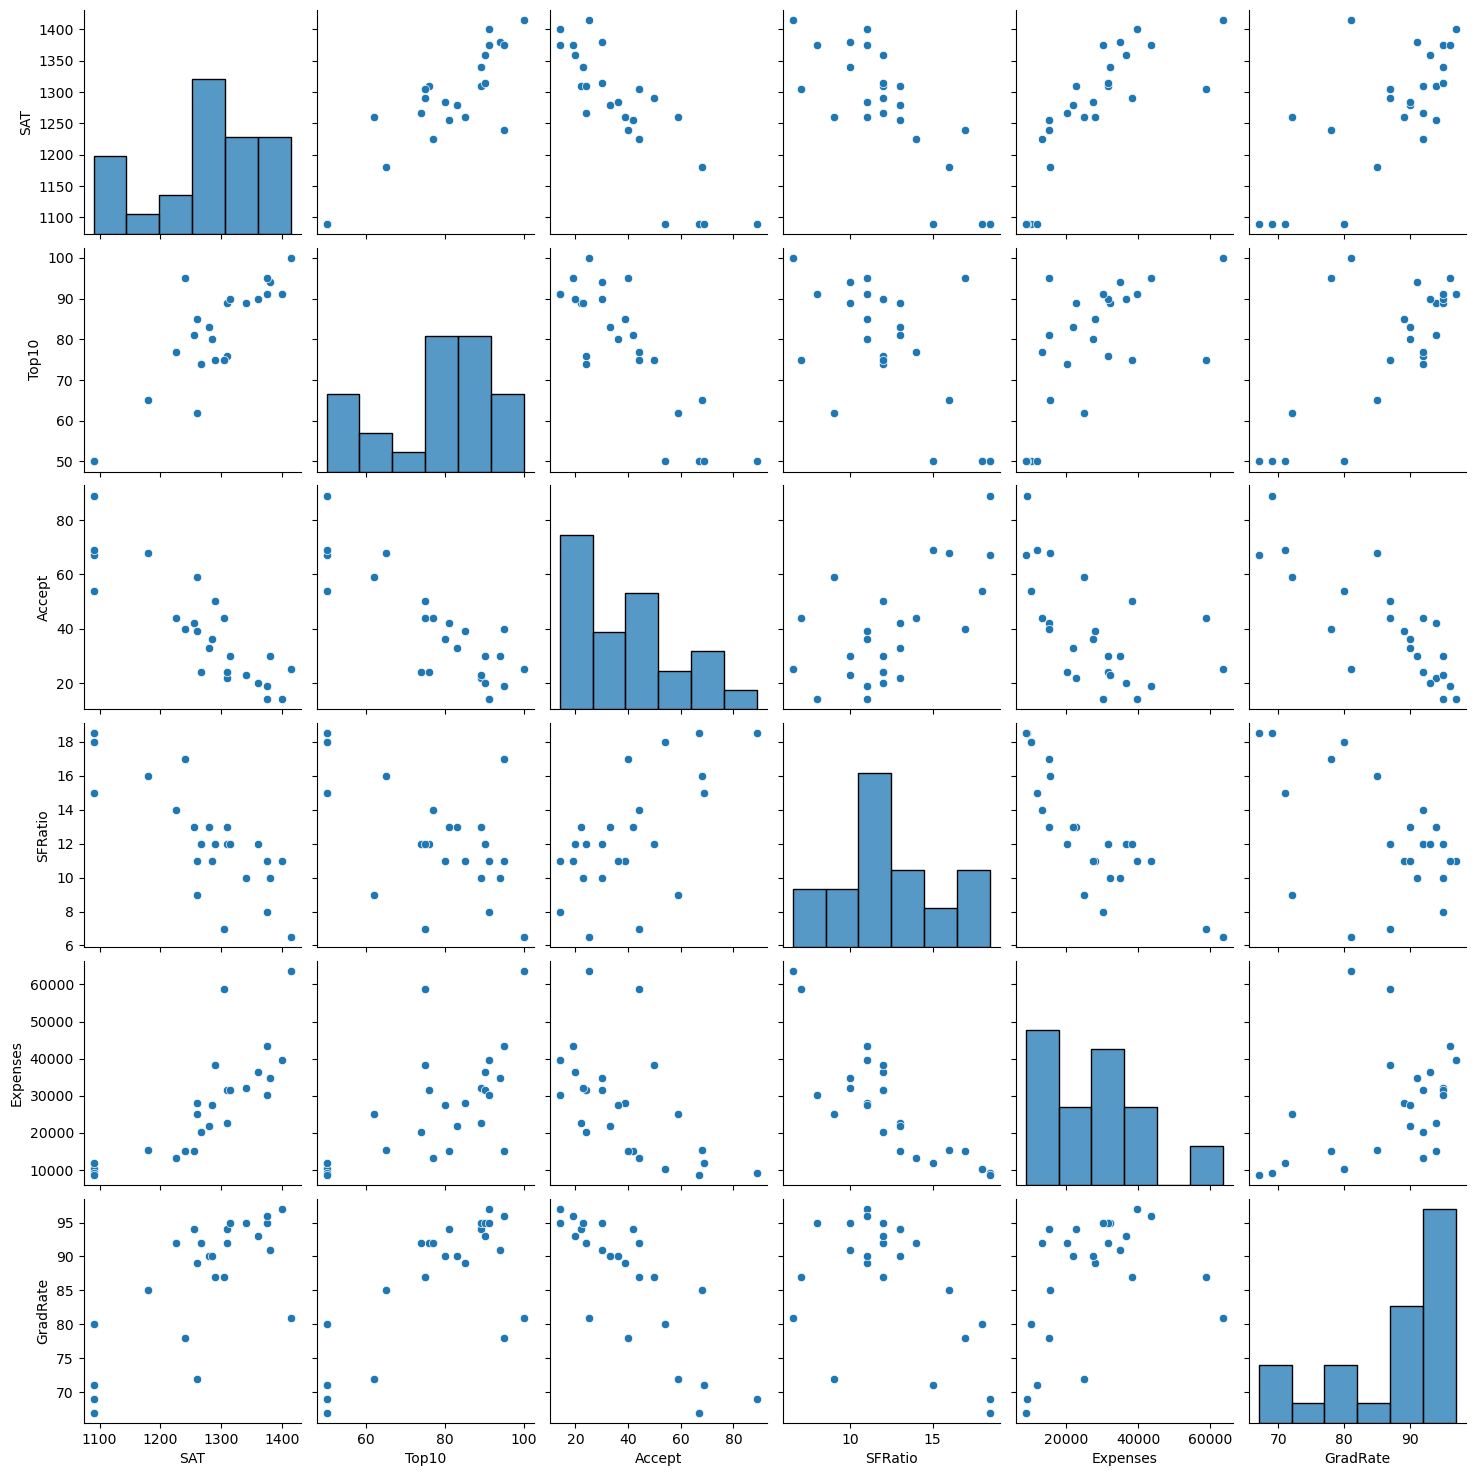

In [49]:
sns.pairplot(df_num)

In [50]:
df_num.corr()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
SAT,1.000000,0.901663,-0.870891,-0.826604,0.793024,0.736630
Top10,0.901663,1.000000,-0.849428,-0.618479,0.615067,0.729043
Accept,-0.870891,-0.849428,1.000000,0.629935,-0.558775,-0.828694
SFRatio,-0.826604,-0.618479,0.629935,1.000000,-0.836756,-0.499986
Expenses,0.793024,0.615067,-0.558775,-0.836756,1.000000,0.396282
GradRate,0.736630,0.729043,-0.828694,-0.499986,0.396282,1.000000


In [53]:
df_num.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310.0,89,22,13.0,22704,94.0
1,1415.0,100,25,6.5,63575,81.0
2,1260.0,62,59,9.0,25026,72.0
3,1310.0,76,24,12.0,31510,92.0
4,1280.0,83,33,13.0,21864,90.0


In [51]:
col = list(df_num.columns)
print(col)

['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate']


In [ ]:
# Normalized the categorical data

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
df_num = scaler.fit_transform(df_num)

In [57]:
df_num

array([[0.67692308, 0.78      , 0.10666667, 0.54166667, 0.25514388,
        0.9       ],
       [1.        , 1.        , 0.14666667, 0.        , 1.        ,
        0.46666667],
       [0.52307692, 0.24      , 0.6       , 0.20833333, 0.29746132,
        0.16666667],
       [0.67692308, 0.52      , 0.13333333, 0.45833333, 0.41562939,
        0.83333333],
       [0.58461538, 0.66      , 0.25333333, 0.54166667, 0.23983525,
        0.76666667],
       [0.76923077, 0.78      , 0.12      , 0.29166667, 0.4275118 ,
        0.93333333],
       [0.69230769, 0.8       , 0.21333333, 0.45833333, 0.41699623,
        0.93333333],
       [0.54435897, 0.48      , 0.13333333, 0.45833333, 0.20816096,
        0.83333333],
       [0.95384615, 0.82      , 0.        , 0.375     , 0.56169926,
        1.        ],
       [0.66153846, 0.5       , 0.4       , 0.04166667, 0.91099123,
        0.66666667],
       [0.89230769, 0.88      , 0.21333333, 0.29166667, 0.47686392,
        0.8       ],
       [0.52307692, 0

In [59]:
df_num = pd.DataFrame(df_num, columns = col)

In [61]:
df_num.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.676923,0.78,0.106667,0.541667,0.255144,0.900000
1,1.000000,1.00,0.146667,0.000000,1.000000,0.466667
2,0.523077,0.24,0.600000,0.208333,0.297461,0.166667
3,0.676923,0.52,0.133333,0.458333,0.415629,0.833333
4,0.584615,0.66,0.253333,0.541667,0.239835,0.766667


In [62]:
data = pd.concat([df_cat,df_num],axis = 1)

In [63]:
data

,Univ,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,...,State_RI,State_TX,State_VA,State_WI,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0.676923,0.78,0.106667,0.541667,0.255144,0.900000
1,CalTech,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.000000,1.00,0.146667,0.000000,1.000000,0.466667
2,CMU,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.523077,0.24,0.600000,0.208333,0.297461,0.166667
3,Columbia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.676923,0.52,0.133333,0.458333,0.415629,0.833333
4,Cornell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.584615,0.66,0.253333,0.541667,0.239835,0.766667
5,Dartmouth,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.769231,0.78,0.120000,0.291667,0.427512,0.933333
6,Duke,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0.692308,0.80,0.213333,0.458333,0.416996,0.933333
7,Georgetown,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.544359,0.48,0.133333,0.458333,0.208161,0.833333
8,Harvard,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.953846,0.82,0.000000,0.375000,0.561699,1.000000
9,JohnsHopkins,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0.661538,0.50,0.400000,0.041667,0.910991,0.666667


In [64]:
data.describe()

,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,State_NJ,...,State_RI,State_TX,State_VA,State_WI,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.00,25.00,25.000000,25.000000,25.000000,25.00,25.00,25.00,25.00,25.00,...,25.00,25.00,25.00,25.00,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.04,0.04,0.080000,0.080000,0.080000,0.04,0.04,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.558390,0.565600,0.335467,0.493333,0.340508,0.662667
std,0.20,0.20,0.276887,0.276887,0.276887,0.20,0.20,0.20,0.20,0.20,...,0.20,0.20,0.20,0.20,0.303338,0.312811,0.261610,0.277086,0.262887,0.303882
min,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.461538,0.480000,0.133333,0.375000,0.117293,0.466667
50%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.600000,0.620000,0.293333,0.458333,0.343515,0.766667
75%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.769231,0.800000,0.480000,0.625000,0.476864,0.900000
max,1.00,1.00,1.000000,1.000000,1.000000,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Building using Hierarchical Clustering - Agglomerative Clustering

In [65]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [66]:
from sklearn.cluster import AgglomerativeClustering

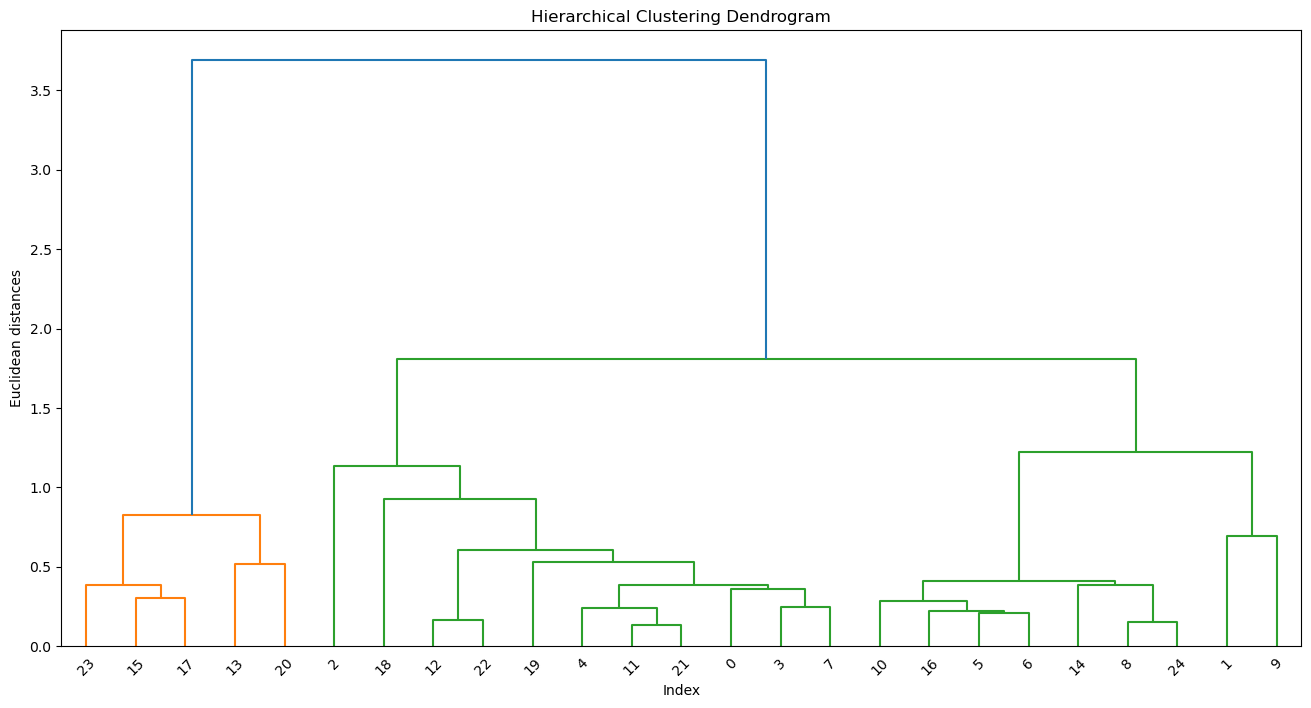

In [67]:
plt.figure(1, figsize = (16, 8))
tree_plot = dendrogram(linkage(df_num, method  = "ward"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Apply AgglomerativeClustering choosing 3 clusters

In [68]:
a = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',linkage = 'complete')

In [69]:
a1 = a.fit_predict(df_num)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [70]:
a1

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0,
       0, 1, 2], dtype=int64)

In [71]:
a.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0,
       0, 1, 2], dtype=int64)

In [72]:
cluster_labels = pd.Series(a.labels_)

In [75]:
df_clust = pd.concat([df,cluster_labels],axis = 1)

In [76]:
df_clust.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,0
0,Brown,RI,1310.0,89,22,13.0,22704,94.0,0
1,CalTech,CA,1415.0,100,25,6.5,63575,81.0,2
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,0
3,Columbia,NY,1310.0,76,24,12.0,31510,92.0,0
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0,0


In [ ]:
df_clust = df_clust.rename(columns = {0 : 'cluster'})

In [91]:
df_clust.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,RI,1310.0,89,22,13.0,22704,94.0,0
1,CalTech,CA,1415.0,100,25,6.5,63575,81.0,2
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,0
3,Columbia,NY,1310.0,76,24,12.0,31510,92.0,0
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0,0


In [ ]:
# cluster evaluation for complete linkage

In [ ]:
from sklearn import metrics

In [92]:
metrics.silhouette_score(df_num,cluster_labels)

0.305169186862273

In [ ]:
# Single linkage

In [82]:
b = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')

In [83]:
b1 = b.fit_predict(df_num)
b1

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [84]:
b.labels_

array([0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [85]:
cluster_labels_b = pd.Series(b.labels_)

In [88]:
df_clust_single = pd.concat([df,cluster_labels_b], axis = 1)
df_clust_single.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,0
0,Brown,RI,1310.0,89,22,13.0,22704,94.0,0
1,CalTech,CA,1415.0,100,25,6.5,63575,81.0,1
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,2
3,Columbia,NY,1310.0,76,24,12.0,31510,92.0,0
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0,0


In [89]:
df_clust_single = df_clust_single.rename(columns = {0:'clusterSingle'})

In [90]:
df_clust_single.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterSingle
0,Brown,RI,1310.0,89,22,13.0,22704,94.0,0
1,CalTech,CA,1415.0,100,25,6.5,63575,81.0,1
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,2
3,Columbia,NY,1310.0,76,24,12.0,31510,92.0,0
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0,0


In [ ]:
# cluster evaluation when using single linkage

In [ ]:
from sklearn import metrics

In [94]:
metrics.silhouette_score(df_num,cluster_labels_b)

0.06007568004568929

In [ ]:
# average linkage

In [95]:
c = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')

In [97]:
c1 = c.fit_predict(df_num)
c1

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [98]:
c.labels_

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [99]:
cluster_label_c = pd.Series(c.labels_)

In [101]:
df_clust_average = pd.concat([df,cluster_label_c],axis = 1)
df_clust_average.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,0
0,Brown,RI,1310.0,89,22,13.0,22704,94.0,0
1,CalTech,CA,1415.0,100,25,6.5,63575,81.0,0
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,2
3,Columbia,NY,1310.0,76,24,12.0,31510,92.0,0
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0,0


In [103]:
df_clust_average = df_clust_average.rename(columns = {0:'clusterAvg'})
df_clust_average.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterAvg
0,Brown,RI,1310.0,89,22,13.0,22704,94.0,0
1,CalTech,CA,1415.0,100,25,6.5,63575,81.0,0
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,2
3,Columbia,NY,1310.0,76,24,12.0,31510,92.0,0
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0,0


In [ ]:
# evaluation for avg linkage

In [ ]:
from sklearn import metrics

In [104]:
metrics.silhouette_score(df_num,cluster_label_c)

0.4023773109113495

# for average linkage we get a good results silhouette_score = 0.402 But......

In [ ]:
!pip install clusteval

In [106]:
from clusteval import clusteval

In [107]:
ce = clusteval(evaluate = 'silhouette')

In [108]:
df_array = np.array(df_num)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [00:00<00:00, 562.46it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [2].
[clusteval] >INFO> Fin.


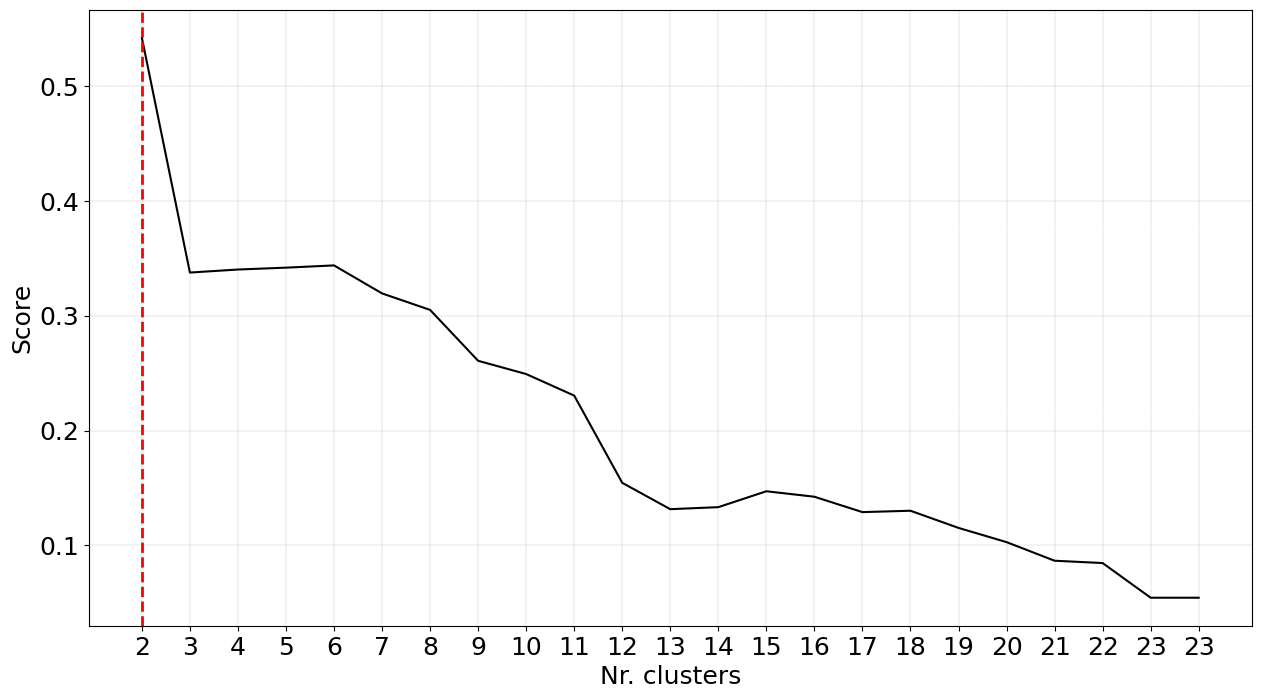

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [109]:
# fit
ce.fit(df_array)

#plot

ce.plot()

In [ ]:
# using the report of clusteval n_clusters = 2,linkage = 'ward'

In [110]:
w = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

In [112]:
w1 = w.fit_predict(df_num)
w1

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [113]:
w.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [115]:
cluster_labels_w2 =pd.Series(w.labels_)

In [116]:
df_clust_ward = pd.concat([df,cluster_labels_w2],axis = 1)
df_clust_ward.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,0
0,Brown,RI,1310.0,89,22,13.0,22704,94.0,0
1,CalTech,CA,1415.0,100,25,6.5,63575,81.0,0
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,0
3,Columbia,NY,1310.0,76,24,12.0,31510,92.0,0
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0,0


In [117]:
df_clust_ward = df_clust_ward.rename(columns = {0:'cluster_ward'})
df_clust_ward.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster_ward
0,Brown,RI,1310.0,89,22,13.0,22704,94.0,0
1,CalTech,CA,1415.0,100,25,6.5,63575,81.0,0
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,0
3,Columbia,NY,1310.0,76,24,12.0,31510,92.0,0
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0,0


In [ ]:
from sklearn import metrics

In [118]:
metrics.silhouette_score(df_num,cluster_labels_w2)

0.5419798544365135

# n_clusters = 2, linkage = 'ward' we get better result than avg.. = 0.5419798544

In [ ]:
# aggregate using mean of each cluster

In [119]:
df_clust_ward.iloc[ : ,2:8].groupby(df_clust_ward.cluster_ward).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster_ward,,,,,,
0,1312.345833,84.6,31.6,11.225,31470.9,90.0
1,1108.000000,53.0,69.4,17.200,11056.4,74.4


In [120]:
df_clust_ward.to_csv('University.csv', encoding = 'utf-8')
import os
os.getcwd()

'C:\\Users\\Administrator'